# Predict VWC from SAR backscatter VV and NDVI data


In [1]:
import os

newpath = r'./img' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

Mean Squared Error: 19.942331506101688


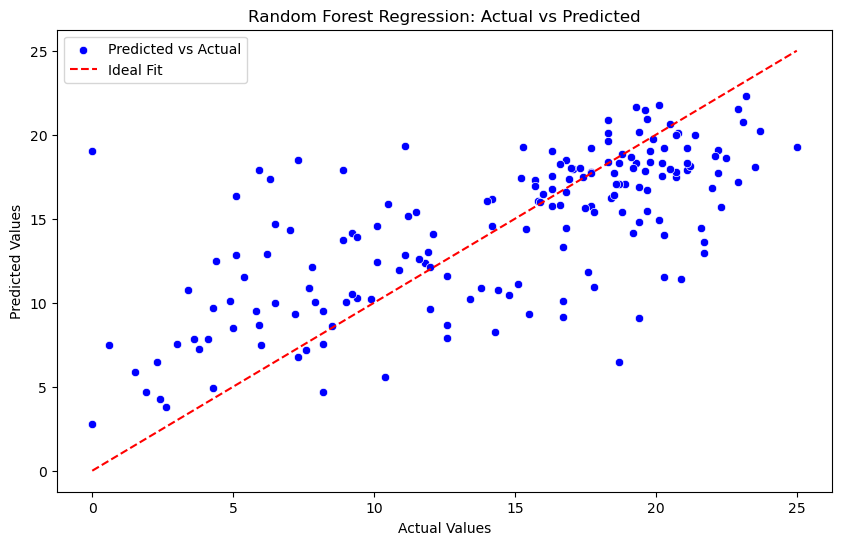

In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_splitimport os

newpath = r'./img' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("RF_Data.csv", parse_dates=True)

# Assume the last column is the target variable and the rest are features
X = df[['EUSTN_VV','FINCH_VV', 'RISEH_VV', 'MORLY_VV', 'RDMER_VV', 'EUSTN_NDVI', 'FINCH_NDVI', 'MORLY_NDVI', 'RISEH_NDVI', 'RDMER_NDVI']]
y = df['EUSTN_VWC']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [60]:
print(len(y_test))

177


In [61]:
# Make predictions
y_pred_ts = rf_regressor.predict(df[['EUSTN_VV','FINCH_VV', 'RISEH_VV', 'MORLY_VV', 'RDMER_VV', 'EUSTN_NDVI', 'FINCH_NDVI', 'MORLY_NDVI', 'RISEH_NDVI', 'RDMER_NDVI']])

In [62]:
df['y_pred'] = y_pred_ts

In [40]:
print(df)

           Date  EUSTN_VV  FINCH_VV  MORLY_VV  RISEH_VV  RDMER_VV  ELMST_VV  \
0    24/06/2017  0.019416  0.062074  0.193945  0.036337  0.046626  0.183468   
1    25/06/2017  0.025130  0.111032  0.166839  0.057465  0.059971  0.170133   
2    27/06/2017  0.029571  0.037984  0.154088  0.024299  0.042130  0.037408   
3    30/06/2017  0.026512  0.071004  0.165768  0.037607  0.138454  0.128720   
4    01/07/2017  0.030542  0.054849  0.169746  0.063913  0.078136  0.126024   
..          ...       ...       ...       ...       ...       ...       ...   
879  30/10/2024  0.037255  0.124300  0.058327  0.037935  0.192654  0.160905   
880  02/11/2024  0.026745  0.064460  0.070665  0.053771  0.168489  0.085846   
881  09/11/2024  0.018488  0.102933  0.082484  0.062130  0.147440  0.080604   
882  11/11/2024  0.035908  0.084640  0.141346  0.029982  0.144380  0.109733   
883  14/11/2024  0.022204  0.043196  0.053003  0.042168  0.100895  0.054013   

     EUSTN_NDVI  FINCH_NDVI  MORLY_NDVI  ...  RDMER

/tmp/ipykernel_266436/2793558275.py:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


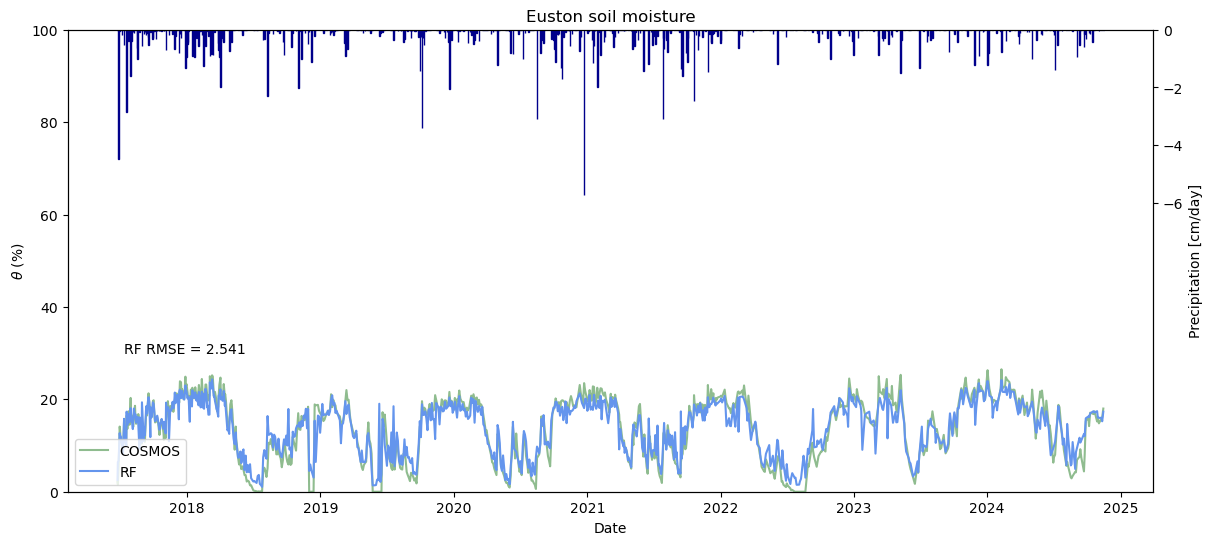

<Figure size 640x480 with 0 Axes>

In [41]:
import math
import datetime as dt
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(1,1, figsize=(14,6), sharex=True)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# x axis to plot both runoff and precip. against
x = df['Date'].values
y = df['EUSTN_VWC'].values

y2 = -np.array(df['EUSTN_P'].values)

# predicted
y3 = np.array(df['y_pred'].values)

# Smooth using gaussian
ysmoothed = gaussian_filter1d(y, sigma=5)
y3smoothed = gaussian_filter1d(y3, sigma=5)

# Plot 
ax1.plot(x, y, color="darkseagreen", label="COSMOS")
ax1.plot(x, y3, color="cornflowerblue", label="RF")
ax1.set_xlabel("Date")
ax1.set_ylabel(r"$\theta$ (%)")
ax1.legend(loc="lower left")
ax1.set_ylim(0, 100)

# Create second axes, in order to get the bars from the top you can multiply 
# by -1
ax2 = ax1.twinx()

ax2.bar(x, y2/10, color="darkblue", edgecolor="darkblue", width=1.5)
ax2.set_ylabel("Precipitation [cm/day]")
ax2.set_ylim(-16, 0)
ax2.set_yticks([0,-2,-4,-6])
 
# Hydrus RMSE
MSE = np.nanmean(np.square(np.subtract(y3, y)))
RMSE = math.sqrt(MSE)
ax1.annotate("RF RMSE = {:.3f}".format(RMSE), (x[10], 30))
plt.title("Euston soil moisture")

fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig("img/RF1.jpeg", bbox_inches="tight", dpi=300)

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("RF_Data2.csv", parse_dates=True)
sites = []

data = []
dfNew = pd.DataFrame(data)

dfEUSTN = pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']})
dfELMST = pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']})
dfFINCH = pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']})
dfMORLY = pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']})
dfRISEH = pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']})
dfRDMER = pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']})
dfWRTTL = pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']})
dfWIMPL = pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']})
dfCARDT = pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']})
dfROTHD = pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']})
dfCHOBH = pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']})

# Concatenate dataframe
dfNew = pd.concat([dfNew, dfEUSTN, dfFINCH, dfMORLY, dfELMST, dfRISEH, dfRDMER, dfWRTTL, dfWIMPL, dfCARDT, dfROTHD, dfCHOBH])
target = []
target = df[['CHOBH_VWC']]

sites.append(pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']}))
sites.append(pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']}))
sites.append(pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']}))
sites.append(pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']}))
sites.append(pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']}))
sites.append(pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']}))
sites.append(pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']}))
sites.append(pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']}))
sites.append(pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']}))
sites.append(pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']}))
sites.append(pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']}))
#print(sites)

rf_models = []

# Separate features and target variable
for site in sites:
    
    X = site[['VV', 'NDVI', 'P', 'PE']]
    y = site['VWC']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Create a Gradient Boosting Regressor model
    #rf_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    #rf_regressor = LinearRegression()

    # Train the model
    rf_regressor.fit(X_train, y_train)
    
    rf_models.append(rf_regressor)

    # Make predictions
    #predications.append(rf_regressor.predict(X_test))

# Get predictions from each random forest model
predictions = []
for model in rf_models:
    predictions.append(model.predict(pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'PE': df['CHOBH_PE']})))

# Combine predictions into a single dataframe
predictions_df = pd.DataFrame(predictions).T

print(predictions_df)

# Train a meta-model (linear regression) on the predictions
meta_model = LinearRegression()
meta_model.fit(predictions_df, target)
#meta_model.fit(predictions_df, df['CARDT_VWC'])

# Use the meta-model to make final predictions
final_predictions = meta_model.predict(predictions_df)

print("Final predictions for the new data:")
print(final_predictions)

print(target)
    
# Evaluate the model

# Predict the target variable using the trained model
#predictions = model.predict(new_data_scaled)

# Make predictions
#X_New = dfCHOBH[['VV', 'NDVI', 'P', 'PE']]

# Scale the new data features
#new_data_scaled = scaler.transform(X_New)

#y_pred = rf_regressor.predict(new_data_scaled)


         0       1       2       3       4       5       6       7       8   \
0    20.820  48.221  30.005  30.957  33.945  63.980  45.642  42.874  28.555   
1    10.498  40.936  27.821  28.326  35.013  61.664  40.706  40.931  25.031   
2    18.110  44.807  28.448  30.261  35.081  71.869  45.329  42.674  26.534   
3    10.177  40.857  28.598  28.022  34.960  62.189  41.279  40.966  25.416   
4    16.513  40.285  27.754  28.089  33.671  60.851  39.257  40.906  26.391   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
760  19.855  40.038  28.343  25.331  34.853  63.548  44.097  40.326  29.297   
761  18.443  40.650  28.899  25.489  33.128  67.733  43.852  39.318  23.197   
762  17.676  41.114  28.951  26.321  35.314  64.317  43.435  39.337  26.578   
763  14.593  44.097  29.032  28.061  30.831  63.553  44.572  41.787  22.859   
764  16.818  41.302  25.335  23.978  31.851  62.477  42.029  38.591  28.754   

         9       10  
0    32.504  57.749  
1    30

In [43]:
df[['EUSTN_VWC', 'ELMST_VWC', 'FINCH_VWC', 'MORLY_VWC', 'RISEH_VWC', 'RDMER_VWC', 'WRTTL_VWC', 'WIMPL_VWC', 'CARDT_VWC', 'ROTHD_VWC', 'CHOBH_VWC']]

,EUSTN_VWC,ELMST_VWC,FINCH_VWC,MORLY_VWC,RISEH_VWC,RDMER_VWC,WRTTL_VWC,WIMPL_VWC,CARDT_VWC,ROTHD_VWC,CHOBH_VWC
0,19.5,45.3,0.0,29.9,42.2,73.7,0.0,0.0,25.9,34.1,55.7
1,18.1,39.9,0.0,27.1,36.5,56.7,0.0,0.0,23.5,32.1,52.8
2,19.3,42.3,0.0,30.9,37.4,75.5,0.0,0.0,26.0,34.4,59.0
3,19.6,45.0,0.0,29.9,37.9,74.0,0.0,0.0,26.4,34.6,58.7
4,20.3,44.3,0.0,27.1,36.8,64.3,0.0,0.0,26.7,35.2,57.9
...,...,...,...,...,...,...,...,...,...,...,...
760,18.0,40.4,27.5,25.7,35.7,0.0,43.8,46.0,34.7,37.4,72.3
761,18.0,40.4,27.5,25.7,35.7,0.0,43.8,46.0,34.7,37.4,72.3
762,18.0,40.4,27.5,25.7,35.7,0.0,43.8,46.0,34.7,37.4,72.3
763,18.0,40.4,27.5,25.7,35.7,0.0,43.8,46.0,34.7,37.4,72.3


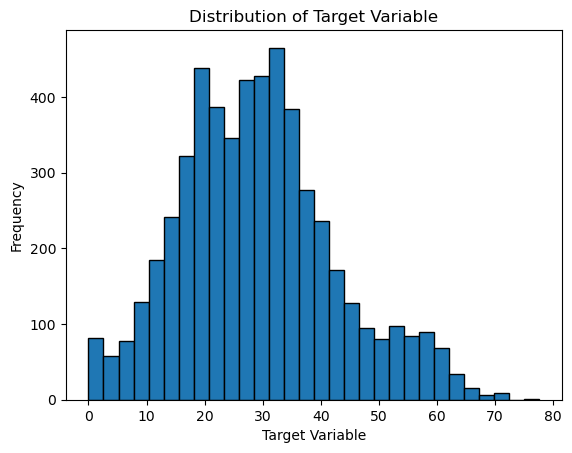

In [45]:
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("RF_Data3.csv", parse_dates=True)

data = []
dfNew = pd.DataFrame(data)

dfEUSTN = pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']})
dfELMST = pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']})
dfFINCH = pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']})
dfMORLY = pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']})
dfRISEH = pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']})
dfRDMER = pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']})
dfWRTTL = pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']})
dfWIMPL = pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']})
dfCARDT = pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']})
dfROTHD = pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']})
dfCHOBH = pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']})

# Concatenate dataframe
dfNew = pd.concat([dfNew, dfEUSTN, dfMORLY, dfELMST, dfRISEH, dfCARDT, dfROTHD, dfCHOBH])

# Assuming 'target' is your target variable
plt.hist(dfNew['VWC'], bins=30, edgecolor='k')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Load dataset
df = pd.read_csv("RF_Data2.csv", parse_dates=True)
data = []
dfNew = pd.DataFrame(data)

dfEUSTN = pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']})
dfELMST = pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']})
dfFINCH = pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']})
dfMORLY = pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']})
dfRISEH = pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']})
dfRDMER = pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']})
dfWRTTL = pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']})
dfWIMPL = pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']})
dfCARDT = pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']})
dfROTHD = pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']})
dfCHOBH = pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']})

# Concatenate dataframe
dfNew = pd.concat([dfNew, dfEUSTN, dfFINCH, dfMORLY, dfELMST, dfRISEH, dfCARDT, dfROTHD, dfCHOBH])

# Assume the last column is the target variable and the rest are features
X = dfNew[['VV','NDVI','P', 'PE']]
y = dfNew['VWC']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_regressor = LinearRegression()

# Create a Gradient Boosting Regressor model
#rf_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

print(rf_regressor.score(X_train, y_train))

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf_regressor, X, y, cv=10)
#print("Cross-validation scores:", scores)


importances = rf_regressor.feature_importances_
feature_names = X.columns
feature_importance = sorted(zip(importances, feature_names), reverse=True)
print("Feature Importance:\n", feature_importance)

# Set up the grid search
#grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
#grid_search.fit(X_train, y_train)

# Best parameters
#print("Best parameters found: ", grid_search.best_params_)

# Make predictions
X_New = dfRISEH[['VV', 'NDVI', 'P', 'PE']]
y_pred = rf_regressor.predict(X_New)

0.9038212857231128
Mean Squared Error: 123.34021663147058
Feature Importance:
 [(np.float64(0.3852592426333378), 'VV'), (np.float64(0.28113106248879555), 'NDVI'), (np.float64(0.24366596872069057), 'PE'), (np.float64(0.0899437261571761), 'P')]


In [47]:
y_pred

array([39.897 , 33.336 , 39.454 , 34.49  , 36.788 , 40.622 , 42.57  ,
       38.484 , 39.492 , 39.659 , 41.977 , 39.143 , 37.083 , 38.508 ,
       42.757 , 30.716 , 43.416 , 37.611 , 39.976 , 36.196 , 40.644 ,
       38.722 , 36.617 , 37.864 , 36.879 , 23.296 , 37.074 , 34.949 ,
       32.681 , 36.85  , 35.557 , 29.873 , 30.976 , 26.739 , 26.678 ,
       26.088 , 26.58  , 23.546 , 26.965 , 25.04  , 21.451 , 24.378 ,
       19.033 , 22.626 , 27.67  , 26.396 , 30.886 , 23.733 , 25.076 ,
       24.495 , 30.031 , 32.402 , 21.469 , 30.453 , 19.001 , 26.423 ,
       21.703 , 21.777 , 19.327 , 20.781 , 26.044 , 15.888 , 21.567 ,
       18.296 , 28.307 , 25.451 , 25.932 , 33.538 , 28.998 , 32.006 ,
       29.157 , 30.307 , 35.697 , 31.237 , 25.865 , 31.368 , 28.652 ,
       33.151 , 27.941 , 24.091 , 31.056 , 32.502 , 33.649 , 28.727 ,
       37.59  , 31.284 , 35.45  , 36.959 , 32.7794, 35.886 , 31.484 ,
       33.778 , 34.743 , 32.528 , 27.774 , 33.835 , 29.696 , 32.288 ,
       33.781 , 32.6

## Use coarse data from COSMOS sites and downscale to points in between

In [48]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dfCoarse = pd.read_csv("SAR_Coarse.csv", parse_dates=True)

# Load dataset
#df = pd.read_csv("RF_Data3.csv", parse_dates=True)

#data = []
#dfCoarse = pd.DataFrame(data)

#dfEUSTN = pd.DataFrame({'longitude': 0.7847, 'latitude': 52.3832, 'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']})
#dfELMST = pd.DataFrame({'longitude': 0.5107, 'latitude': 52.6178, 'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']})
#dfFINCH = pd.DataFrame({'longitude': 1.0342, 'latitude': 52.5481, 'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']})
#dfMORLY = pd.DataFrame({'longitude': -0.5259, 'latitude': 53.2616, 'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']})
#dfRISEH = pd.DataFrame({'longitude': 0.4210, 'latitude': 52.4458, 'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']})
#dfRDMER = pd.DataFrame({'longitude': 0.9931, 'latitude': 52.0946, 'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']})
#dfWRTTL = pd.DataFrame({'longitude': 0.4179, 'latitude': 51.7339, 'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']})
#dfWIMPL = pd.DataFrame({'longitude': -0.0444, 'latitude': 52.1321, 'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']})
#dfCARDT = pd.DataFrame({'longitude': -0.4246, 'latitude': 52.1056, 'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']})
#dfROTHD = pd.DataFrame({'longitude': -0.3783, 'latitude': 51.8138, 'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']})
#dfCHOBH = pd.DataFrame({'longitude': -0.5975, 'latitude': 51.3678, 'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']})

# Concatenate dataframe
#dfCoarse = pd.concat([dfCoarse, dfEUSTN, dfFINCH, dfMORLY, dfRISEH, dfRDMER, dfELMST, dfWRTTL, dfWIMPL, dfCARDT, dfROTHD, dfCHOBH])

#dfFine = pd.read_csv("RF_SAR_Fine.csv", parse_dates=True)

#dfFine = pd.read_csv("SAR_Fine_1km.csv", parse_dates=True)

dfFine = pd.read_csv("SAR_Fine2.csv", parse_dates=True)


# EUSTN: 52.3832 , 0.7847 
# FINCH: 52.6178 , 0.5107
# MORLY: 52.5481 , 1.0342
# RISEH: 53.2616 , -0.5259
# RDMER: 52.4458 , 0.4210
# ELMST: 52.0946 , 0.9931
# WRTTL: 51.7339 , 0.4179
# WIMPL: 52.1321 , -0.0444
# CARDT: 52.1056 , -0.4246
# ROTHD: 51.8138 , -0.3783
# CHOBH: 51.3678 , -0.5975

# Assume the last column is the target variable and the rest are features
X = dfCoarse[['longitude', 'latitude', 'VV', 'NDVI']]
y = dfCoarse['VWC']

X_Fine = dfFine[['longitude', 'latitude', 'VV', 'NDVI']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Make predictions
y_pred_fine = rf_regressor.predict(X_Fine)



Mean Squared Error: 145.73519337888976


In [49]:
y_pred_fine

array([60.6405, 60.3894, 60.2175, ..., 48.5814, 48.4664, 48.4664],
      shape=(10900,))

In [50]:
len(y_pred_fine)

10900

In [51]:
dfFine['VWC'] = y_pred_fine
dfFine

,longitude,latitude,VV,VH,NDVI,VWC
0,-7.680596,49.811583,0.189216,0.004057,0.036131,60.6405
1,-7.590764,49.811583,0.182234,0.003705,0.032498,60.3894
2,-7.500933,49.811583,0.171306,0.003560,0.013444,60.2175
3,-7.411101,49.811583,0.162464,0.003621,0.025815,60.2191
4,-7.321270,49.811583,0.151636,0.003345,0.015292,60.1949
...,...,...,...,...,...,...
10895,1.661883,58.704904,0.007276,0.000685,0.038025,48.5814
10896,1.751715,58.704904,0.005859,0.000682,0.038025,48.5814
10897,1.841546,58.704904,0.005201,0.000681,0.038025,48.5814
10898,1.931378,58.704904,0.003414,0.000715,0.025269,48.4664


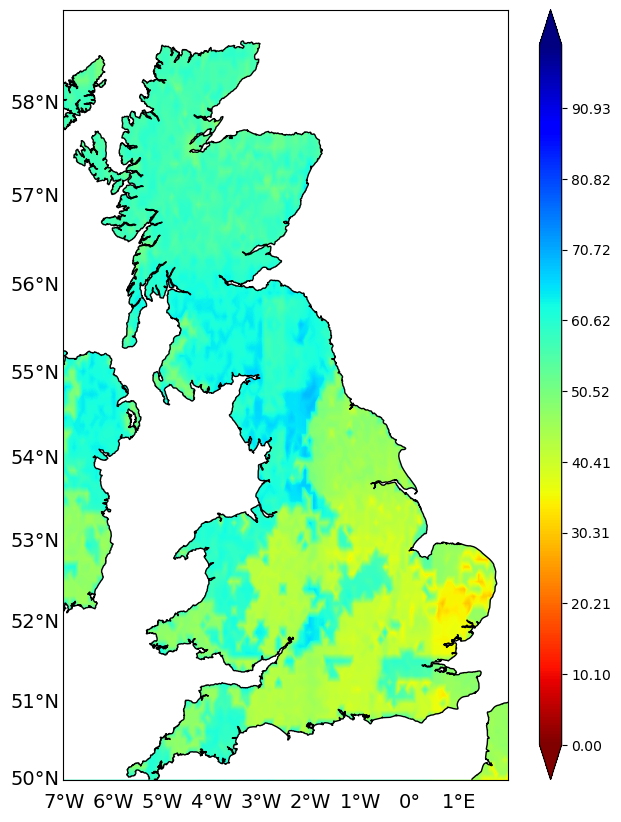

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.interpolate import griddata
from matplotlib.patches import Path, PathPatch
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(10,10))

# Create a basemap of the UK
map = Basemap(projection='merc', llcrnrlat=50, urcrnrlat=59, llcrnrlon=-7, urcrnrlon=2, resolution='h', ax=ax, area_thresh=1000)

# Draw map features
map.drawcoastlines()

# Example data points
lons = dfFine['longitude']
lats = dfFine['latitude']
values = dfFine['VWC']  # Example values to plot

data = np.array(dfFine)

gridx = np.arange(np.amin(data[:,0]), np.amax(data[:,0]), 0.01)
gridy = np.arange(np.amin(data[:,1]), np.amax(data[:,1]), 0.01)

xintrp, yintrp = np.meshgrid(gridx, gridy)

# Convert latitude and longitude to map projection
x, y = map(xintrp, yintrp)

# Interpolate y values on the grid
y_grid = griddata((data[:,0], data[:,1]), data[:,5], (xintrp, yintrp), method='linear')

cs = ax.contourf(x, y, y_grid, np.linspace(0, 100, len(gridx)), extend='both', cmap='jet_r')
cbar = map.colorbar(cs, location='right', pad='7%')

parallels = np.arange(50.0, 59.0, 1.0)
map.drawparallels(parallels, labels=[1,0,0,0], fontsize=14, linewidth=0.0, dashes=(None,None))
meridians = np.arange(-7.0, 2.0, 1.0)
map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=14, linewidth=0.0, dashes=(None,None))
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
map_edges = np.array([[x0, y0], [x1, y0], [x1, y1], [x0, y1]])
polys = [p.boundary for p in map.landpolygons]
polys = [map_edges] + polys
codes = [[Path.MOVETO] + [Path.LINETO for _ in p[1:]] for p in polys]
polys_lin = [v for p in polys for v in p]
codes_lin = [code for cs in codes for code in cs]
path = Path(polys_lin, codes_lin)
patch = PathPatch(path, facecolor='white', lw=0)
ax.add_patch(patch)
fig1 = plt.gcf()
plt.show()
plt.draw()

fig1.savefig("./img/ML.jpeg", bbox_inches="tight", dpi=300)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from functools import reduce

# Load dataset
df = pd.read_csv("RF_Data2.csv", parse_dates=True)
sites = []

data = []
dfNew = pd.DataFrame(data)

dfEUSTN = pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']})
dfELMST = pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']})
dfFINCH = pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']})
dfMORLY = pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']})
dfRISEH = pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']})
dfRDMER = pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']})
dfWRTTL = pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']})
dfWIMPL = pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']})
dfCARDT = pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']})
dfROTHD = pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']})
dfCHOBH = pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']})

# Concatenate dataframe
dfNew = pd.concat([dfNew, dfFINCH, dfMORLY, dfELMST, dfRISEH, dfRDMER, dfWRTTL, dfWIMPL, dfCARDT, dfROTHD, dfCHOBH])
target = []
target = df[['CHOBH_VWC']]

#sites.append(pd.DataFrame({'VV': df['EUSTN_VV'], 'NDVI': df['EUSTN_NDVI'], 'P': df['EUSTN_P'], 'VWC': df['EUSTN_VWC'], 'PE': df['EUSTN_PE']}))
sites.append(pd.DataFrame({'VV': df['ELMST_VV'], 'NDVI': df['ELMST_NDVI'], 'P': df['ELMST_P'], 'VWC': df['ELMST_VWC'], 'PE': df['ELMST_PE']}))
sites.append(pd.DataFrame({'VV': df['FINCH_VV'], 'NDVI': df['FINCH_NDVI'], 'P': df['FINCH_P'], 'VWC': df['FINCH_VWC'], 'PE': df['FINCH_PE']}))
sites.append(pd.DataFrame({'VV': df['MORLY_VV'], 'NDVI': df['MORLY_NDVI'], 'P': df['MORLY_P'], 'VWC': df['MORLY_VWC'], 'PE': df['MORLY_PE']}))
sites.append(pd.DataFrame({'VV': df['RISEH_VV'], 'NDVI': df['RISEH_NDVI'], 'P': df['RISEH_P'], 'VWC': df['RISEH_VWC'], 'PE': df['RISEH_PE']}))
sites.append(pd.DataFrame({'VV': df['RDMER_VV'], 'NDVI': df['RDMER_NDVI'], 'P': df['RDMER_P'], 'VWC': df['RDMER_VWC'], 'PE': df['RDMER_PE']}))
sites.append(pd.DataFrame({'VV': df['WRTTL_VV'], 'NDVI': df['WRTTL_NDVI'], 'P': df['WRTTL_P'], 'VWC': df['WRTTL_VWC'], 'PE': df['WRTTL_PE']}))
sites.append(pd.DataFrame({'VV': df['WIMPL_VV'], 'NDVI': df['WIMPL_NDVI'], 'P': df['WIMPL_P'], 'VWC': df['WIMPL_VWC'], 'PE': df['WIMPL_PE']}))
sites.append(pd.DataFrame({'VV': df['CARDT_VV'], 'NDVI': df['CARDT_NDVI'], 'P': df['CARDT_P'], 'VWC': df['CARDT_VWC'], 'PE': df['CARDT_PE']}))
sites.append(pd.DataFrame({'VV': df['ROTHD_VV'], 'NDVI': df['ROTHD_NDVI'], 'P': df['ROTHD_P'], 'VWC': df['ROTHD_VWC'], 'PE': df['ROTHD_PE']}))
sites.append(pd.DataFrame({'VV': df['CHOBH_VV'], 'NDVI': df['CHOBH_NDVI'], 'P': df['CHOBH_P'], 'VWC': df['CHOBH_VWC'], 'PE': df['CHOBH_PE']}))
#print(sites)

rf_models = []

# Separate features and target variable
for site in sites:
    
    X = site[['VV', 'NDVI', 'P', 'PE']]
    y = site['VWC']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Create a Gradient Boosting Regressor model
    #rf_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    #rf_regressor = LinearRegression()

    # Train the model
    rf_regressor.fit(X_train, y_train)
    
    rf_models.append(rf_regressor)
    
    print ("rf score ", rf_regressor.score(X_test, y_test))

    # Make predictions
    #predications.append(rf_regressor.predict(X_test))

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a


X = dfNew[['VV', 'NDVI', 'P', 'PE']]
y = dfNew['VWC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# in the line below, we create 10 random forest classifier models
# in this step below, we combine the list of random forest models into one giant model
rf_combined = reduce(combine_rfs, rf_models)
# the combined model scores better than *most* of the component models
print ("rf combined score", rf_combined.score(X_test, y_test))

rf_combined.fit(X_test, y_test)

y_pred = rf_combined.predict(dfEUSTN[['VV', 'NDVI', 'P', 'PE']])



print(y_pred)

rf score  0.4069396621419644
rf score  0.7765128075311015
rf score  0.4116221974717562
rf score  0.357557659740256
rf score  0.9761687078470993
rf score  0.6266368043565548
rf score  0.9267850345913122
rf score  0.4995940216008219
rf score  0.5217182462818902
rf score  0.3735008436450197
rf combined score 0.4131300452879322
[32.1412  36.0113  31.1285  42.6811  34.5212  38.9561  31.0745  32.719
 34.8744  33.4766  34.3197  42.0025  33.7751  38.4662  44.5099  30.5115
 33.2449  33.8666  29.095   41.1487  30.9236  45.211   40.1053  34.4208
 27.0638  25.4677  42.6401  37.3671  21.4754  36.9188  20.8204  23.0457
 21.3698  19.6569  15.5066  23.7674  16.442   21.4943  19.9752  32.6388
 21.3008  19.2931  24.7625  23.6872  22.0388  31.6346  20.7555  19.8229
 23.7009  21.0949  28.6169  39.3534  23.3862  25.8561  21.1978  24.0615
 23.794   24.5805  30.9694  15.3826  12.6304  17.6488  17.1399  29.7938
 20.6524  20.933   20.1348  41.0861  22.7337  30.8479  34.7784  20.5413
 30.7357  23.6751  25.8174 

/tmp/ipykernel_266436/3054100214.py:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


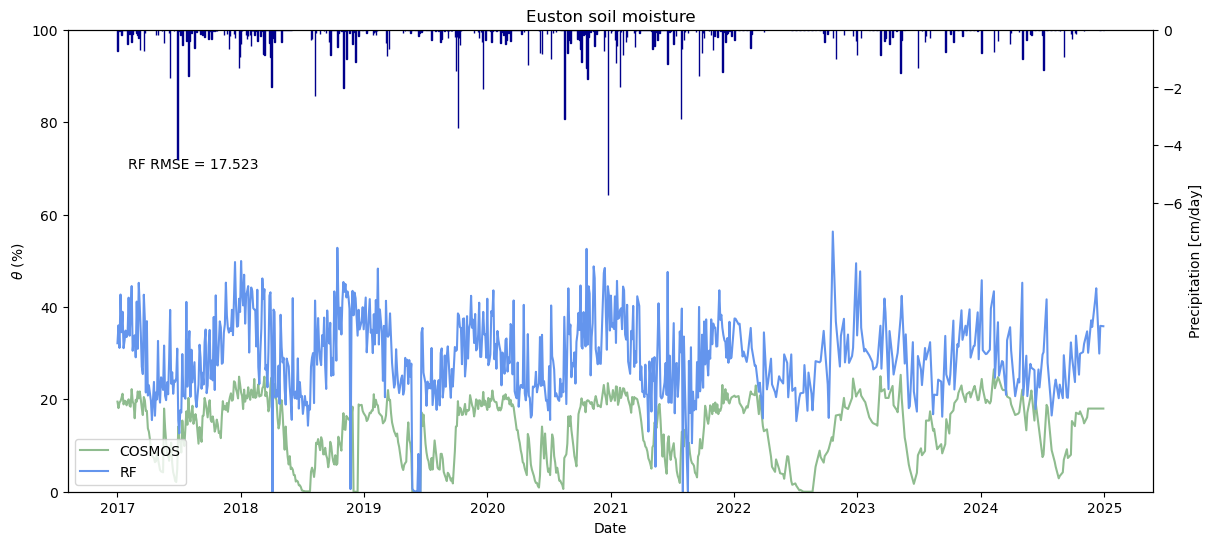

<Figure size 640x480 with 0 Axes>

In [54]:
import math
import datetime as dt
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(1,1, figsize=(14,6), sharex=True)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# x axis to plot both runoff and precip. against
x = df['Date'].values
y = df['EUSTN_VWC'].values

y2 = -np.array(df['EUSTN_P'].values)

# predicted
y3 = y_pred

# Smooth using gaussian
ysmoothed = gaussian_filter1d(y, sigma=5)
y3smoothed = gaussian_filter1d(y3, sigma=5)

# Plot 
ax1.plot(x, y, color="darkseagreen", label="COSMOS")
ax1.plot(x, y3, color="cornflowerblue", label="RF")
ax1.set_xlabel("Date")
ax1.set_ylabel(r"$\theta$ (%)")
ax1.legend(loc="lower left")
ax1.set_ylim(0, 100)

# Create second axes, in order to get the bars from the top you can multiply 
# by -1
ax2 = ax1.twinx()

ax2.bar(x, y2/10, color="darkblue", edgecolor="darkblue", width=1.5)
ax2.set_ylabel("Precipitation [cm/day]")
ax2.set_ylim(-16, 0)
ax2.set_yticks([0,-2,-4,-6])
 
# Hydrus RMSE
MSE = np.nanmean(np.square(np.subtract(y3, y)))
RMSE = math.sqrt(MSE)
ax1.annotate("RF RMSE = {:.3f}".format(RMSE), (x[10], 70))
plt.title("Euston soil moisture")

fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig("img/WIMPLRF1.jpeg", bbox_inches="tight", dpi=300)

## Downscaling coarse VWC from COSMOS stations to finer scale using longitude, latitude, SAR backscatter VV and NDVI data

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dfCoarse = pd.read_csv("SAR_Coarse.csv", parse_dates=True)
dfFine = pd.read_csv("SAR_Fine2.csv", parse_dates=True)

# Assume the last column is the target variable and the rest are features
X = dfCoarse[['longitude', 'latitude', 'VV', 'NDVI']]
y = dfCoarse['VWC']

X_Fine = dfFine[['longitude', 'latitude', 'VV', 'NDVI']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Make predictions
y_pred_fine = rf_regressor.predict(X_Fine)

dfFine['VWC'] = y_pred_fine
dfFine


Mean Squared Error: 145.73519337888976


,longitude,latitude,VV,VH,NDVI,VWC
0,-7.680596,49.811583,0.189216,0.004057,0.036131,60.6405
1,-7.590764,49.811583,0.182234,0.003705,0.032498,60.3894
2,-7.500933,49.811583,0.171306,0.003560,0.013444,60.2175
3,-7.411101,49.811583,0.162464,0.003621,0.025815,60.2191
4,-7.321270,49.811583,0.151636,0.003345,0.015292,60.1949
...,...,...,...,...,...,...
10895,1.661883,58.704904,0.007276,0.000685,0.038025,48.5814
10896,1.751715,58.704904,0.005859,0.000682,0.038025,48.5814
10897,1.841546,58.704904,0.005201,0.000681,0.038025,48.5814
10898,1.931378,58.704904,0.003414,0.000715,0.025269,48.4664


/tmp/ipykernel_266436/676188424.py:25: UserWarning: Adding colorbar to a different Figure <Figure size 1000x1000 with 2 Axes> than <Figure size 1000x1000 with 2 Axes> which fig.colorbar is called on.
  cbar = map.colorbar(cs, location='right', pad='7%')


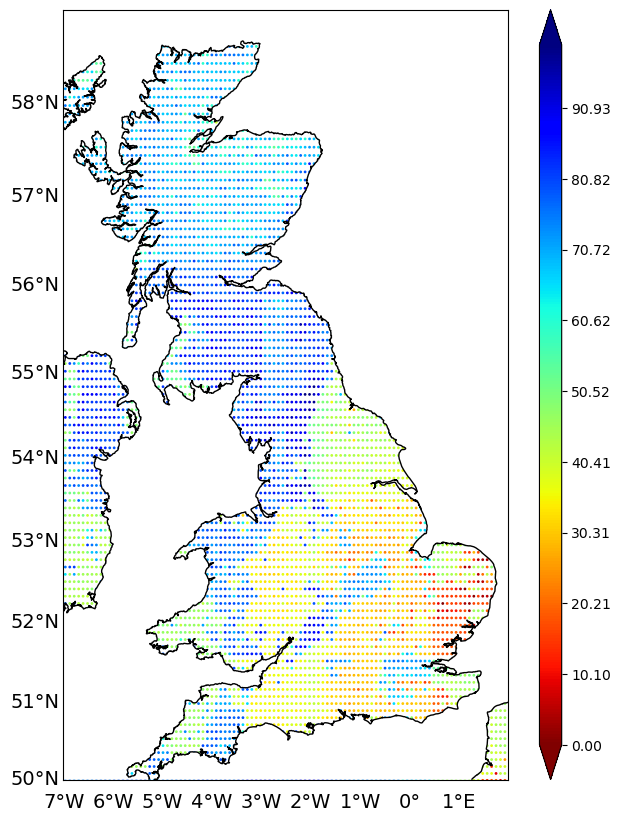

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.interpolate import griddata
from matplotlib.patches import Path, PathPatch
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(10,10))

# Create a basemap of the UK
map = Basemap(projection='merc', llcrnrlat=50, urcrnrlat=59, llcrnrlon=-7, urcrnrlon=2, resolution='h', ax=ax, area_thresh=1000)

# Draw map features
map.drawcoastlines()

# Example data points
lons = dfFine['longitude']
lats = dfFine['latitude']
values = dfFine['VWC']  # Example values to plot

# Convert latitude and longitude to map projection
x, y = map(lons, lats)


cbar = map.colorbar(cs, location='right', pad='7%')

#matplotlib.pyplot.scatter(x, y, s=None, c=None, *, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, colorizer=None, plotnonfinite=False, data=None, **kwargs)[source]

map.scatter(x, y, s=1, c=values, marker='o', cmap='jet_r') 

parallels = np.arange(50.0, 59.0, 1.0)
map.drawparallels(parallels, labels=[1,0,0,0], fontsize=14, linewidth=0.0, dashes=(None,None))
meridians = np.arange(-7.0, 2.0, 1.0)
map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=14, linewidth=0.0, dashes=(None,None))
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
map_edges = np.array([[x0, y0], [x1, y0], [x1, y1], [x0, y1]])
polys = [p.boundary for p in map.landpolygons]
polys = [map_edges] + polys
codes = [[Path.MOVETO] + [Path.LINETO for _ in p[1:]] for p in polys]
polys_lin = [v for p in polys for v in p]
codes_lin = [code for cs in codes for code in cs]
path = Path(polys_lin, codes_lin)
patch = PathPatch(path, facecolor='white', lw=0)
ax.add_patch(patch)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('./img/RF.png', dpi=300, bbox_inches='tight')  # To save the figure as a PNG file